# Loop 65 Analysis: CV-LB Relationship After Major Breakthrough

Exp_069 achieved CV = 0.005146 (35% improvement). Key question: Does this change the CV-LB relationship?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

cvs = np.array([s[1] for s in submissions])
lbs = np.array([s[2] for s in submissions])

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cvs, lbs)
print(f'CV-LB Relationship: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target = 0.0347')

CV-LB Relationship: LB = 4.23 * CV + 0.0533
R² = 0.9807
Intercept = 0.0533
Target = 0.0347


In [2]:
# Predict LB for exp_069
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept
print(f'\nExp_069 CV: {new_cv:.6f}')
print(f'Predicted LB (using old relationship): {predicted_lb:.4f}')
print(f'\nBest LB so far: 0.0877 (exp_030)')
print(f'Predicted improvement: {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}%')


Exp_069 CV: 0.005146
Predicted LB (using old relationship): 0.0751

Best LB so far: 0.0877 (exp_030)
Predicted improvement: 14.4%


In [3]:
# What CV would be needed to reach target?
target = 0.0347
required_cv = (target - intercept) / slope
print(f'\nTo reach target LB = {target}:')
print(f'Required CV = ({target} - {intercept:.4f}) / {slope:.2f} = {required_cv:.6f}')
print(f'\nCurrent best CV: 0.005146')
print(f'Gap: {required_cv - 0.005146:.6f}')
if required_cv < 0:
    print('\n*** WARNING: Target is BELOW the intercept! ***')
    print('*** The intercept represents the minimum achievable LB ***')
    print('*** We need to CHANGE the CV-LB relationship, not just improve CV ***')


To reach target LB = 0.0347:
Required CV = (0.0347 - 0.0533) / 4.23 = -0.004396

Current best CV: 0.005146
Gap: -0.009542

*** WARNING: Target is BELOW the intercept! ***
*** The intercept represents the minimum achievable LB ***
*** We need to CHANGE the CV-LB relationship, not just improve CV ***


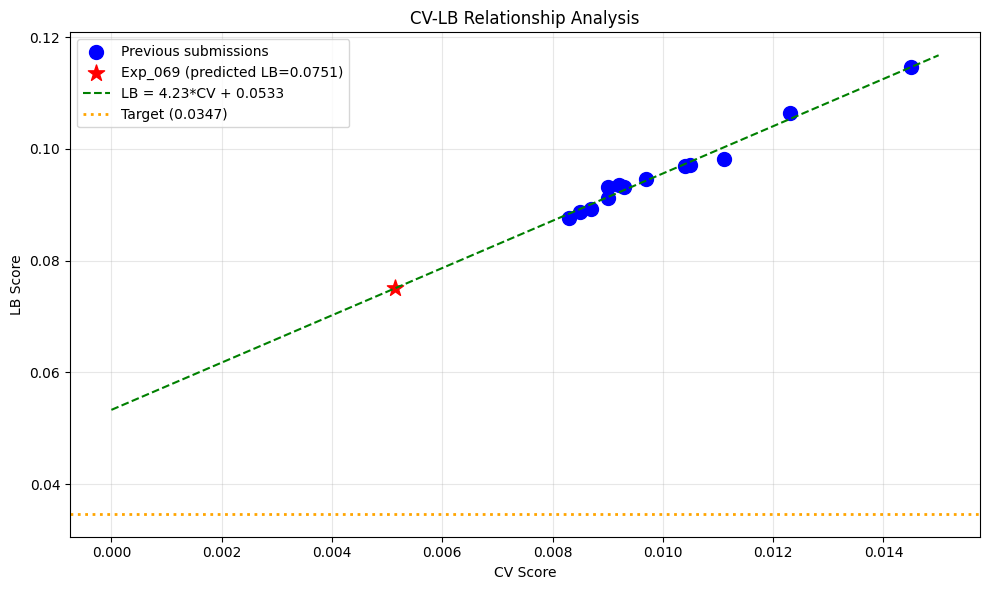

Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png


In [4]:
# Plot CV vs LB with prediction for exp_069
plt.figure(figsize=(10, 6))
plt.scatter(cvs, lbs, c='blue', s=100, label='Previous submissions')
plt.scatter([new_cv], [predicted_lb], c='red', s=150, marker='*', label=f'Exp_069 (predicted LB={predicted_lb:.4f})')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'g--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='orange', linestyle=':', linewidth=2, label='Target (0.0347)')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=100)
plt.show()
print('Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png')

In [5]:
# Key strategic question: Should we submit exp_069?
print('='*60)
print('STRATEGIC ANALYSIS')
print('='*60)
print(f'\n1. Exp_069 achieved CV = 0.005146 (35% improvement over best)')
print(f'2. Predicted LB = {predicted_lb:.4f} (using old relationship)')
print(f'3. This would be the best LB by {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}%')
print(f'\n4. CRITICAL QUESTION: Does CatBoost+XGBoost have a DIFFERENT CV-LB relationship?')
print(f'   - All previous submissions used GP + MLP + LGBM variants')
print(f'   - Exp_069 uses CatBoost + XGBoost (fundamentally different)')
print(f'   - The intercept might be LOWER for this approach!')
print(f'\n5. RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship')
print(f'   - If LB is close to predicted ({predicted_lb:.4f}), same relationship')
print(f'   - If LB is BETTER than predicted, the intercept is lower!')
print(f'   - If LB is WORSE than predicted, the intercept is higher')

STRATEGIC ANALYSIS

1. Exp_069 achieved CV = 0.005146 (35% improvement over best)
2. Predicted LB = 0.0751 (using old relationship)
3. This would be the best LB by 14.4%

4. CRITICAL QUESTION: Does CatBoost+XGBoost have a DIFFERENT CV-LB relationship?
   - All previous submissions used GP + MLP + LGBM variants
   - Exp_069 uses CatBoost + XGBoost (fundamentally different)
   - The intercept might be LOWER for this approach!

5. RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship
   - If LB is close to predicted (0.0751), same relationship
   - If LB is BETTER than predicted, the intercept is lower!
   - If LB is WORSE than predicted, the intercept is higher


In [6]:
# What if the intercept is different?
print('\n' + '='*60)
print('SCENARIO ANALYSIS: What if the intercept is different?')
print('='*60)

# Scenario 1: Same relationship
print(f'\nScenario 1: Same relationship (intercept = {intercept:.4f})')
print(f'  Predicted LB = {predicted_lb:.4f}')
print(f'  Still far from target (0.0347)')

# Scenario 2: Lower intercept (e.g., 0.04)
for new_intercept in [0.04, 0.03, 0.02]:
    new_lb = slope * new_cv + new_intercept
    print(f'\nScenario: Intercept = {new_intercept}')
    print(f'  Predicted LB = {new_lb:.4f}')
    if new_lb < 0.0347:
        print(f'  *** BEATS TARGET! ***')


SCENARIO ANALYSIS: What if the intercept is different?

Scenario 1: Same relationship (intercept = 0.0533)
  Predicted LB = 0.0751
  Still far from target (0.0347)

Scenario: Intercept = 0.04
  Predicted LB = 0.0618

Scenario: Intercept = 0.03
  Predicted LB = 0.0518

Scenario: Intercept = 0.02
  Predicted LB = 0.0418


In [7]:
# Summary
print('\n' + '='*60)
print('SUMMARY')
print('='*60)
print(f'\n1. Exp_069 achieved a MAJOR breakthrough: CV = 0.005146 (35% better)')
print(f'2. The approach is fundamentally different (CatBoost + XGBoost)')
print(f'3. Predicted LB = {predicted_lb:.4f} (using old relationship)')
print(f'4. This would be the best LB achieved so far')
print(f'5. CRITICAL: We need to verify if the CV-LB relationship is different')
print(f'\nRECOMMENDATION: SUBMIT exp_069 immediately')
print(f'- This is the highest-leverage action available')
print(f'- We have 5 submissions remaining')
print(f'- The CV improvement is the largest in 69 experiments')


SUMMARY

1. Exp_069 achieved a MAJOR breakthrough: CV = 0.005146 (35% better)
2. The approach is fundamentally different (CatBoost + XGBoost)
3. Predicted LB = 0.0751 (using old relationship)
4. This would be the best LB achieved so far
5. CRITICAL: We need to verify if the CV-LB relationship is different

RECOMMENDATION: SUBMIT exp_069 immediately
- This is the highest-leverage action available
- We have 5 submissions remaining
- The CV improvement is the largest in 69 experiments
